In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('documents/ТМО Лаб.2/beers.csv', sep=",")

In [6]:
data = data.drop('Unnamed: 0', axis = 1)

In [7]:
data.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [9]:
data.shape

(2410, 7)

## Обработка пропусков данных

In [10]:
data.isnull().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [14]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
print(round(percent_missing,2))

abv            2.57
ibu           41.70
id             0.00
name           0.00
style          0.21
brewery_id     0.00
ounces         0.00
dtype: float64


Видим, что в колонке 'ibu' больше 40% пропусков, что крайне негативно влияет на построение модели. Данную колонку следует удалить.

In [15]:
data = data.drop('ibu', axis = 1)

In [17]:
data.head()

,abv,id,name,style,brewery_id,ounces
0,0.050,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,2262,Sex and Candy,American IPA,177,12.0


## Кодирование категориальных признаков

In [22]:
data['ounces'].unique()

array([12. ,  8.4, 16. , 24. , 19.2, 32. , 16.9])

In [28]:
data['ounces'].value_counts()

12.0    1525
16.0     841
24.0      22
19.2      15
32.0       5
16.9       1
8.4        1
Name: ounces, dtype: int64

Унции - наиболее подходящий категориальный признак, так как остальные имеют слишком много вариантов ('style' - 99, 'abv' - 74) которые при добавлении в таблицу создатут много столбцов, а это будет выглядить ненаглядно.

In [29]:
# Кодируем признак ounces в отдельные столбцы
data = pd.get_dummies(data, columns=['ounces'])

In [30]:
data.head()

,abv,id,name,style,brewery_id,ounces_8.4,ounces_12.0,ounces_16.0,ounces_16.9,ounces_19.2,ounces_24.0,ounces_32.0
0,0.050,1436,Pub Beer,American Pale Lager,408,0,1,0,0,0,0,0
1,0.066,2265,Devil's Cup,American Pale Ale (APA),177,0,1,0,0,0,0,0
2,0.071,2264,Rise of the Phoenix,American IPA,177,0,1,0,0,0,0,0
3,0.090,2263,Sinister,American Double / Imperial IPA,177,0,1,0,0,0,0,0
4,0.075,2262,Sex and Candy,American IPA,177,0,1,0,0,0,0,0


## Масштабирование значений

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler, Normalizer

In [32]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['abv']])

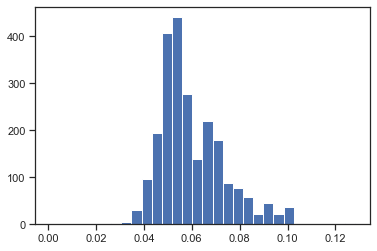

In [42]:
plt.hist(data['abv'], 30)
plt.show()

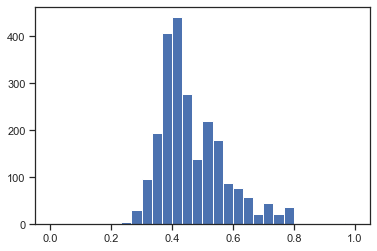

In [44]:
plt.hist(sc1_data, 30)
plt.show()